In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os as os
import numpy as np

In [2]:
def predictive_power(df, df_y):
    pass

In [3]:
os.chdir(r"./Data")
df = pd.read_csv("pd_speech_features.csv")
os.chdir("..")

In [4]:
df = df.groupby(by=df.id).mean()

In [5]:
df['class'].value_counts()

1.0    188
0.0     64
Name: class, dtype: int64

In [6]:
df_y = df['class']
df = df.drop('class', axis=1)

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
from sklearn.metrics import f1_score, accuracy_score

from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline

In [8]:
model = RandomForestClassifier(n_estimators=1000, max_depth=9)

In [9]:
results = cross_validate(model, df, df_y, scoring=["accuracy", "f1"], n_jobs=-1)

In [10]:
print("Accuracy: " + str(results["test_accuracy"].mean()))
print("Accuracy standard deviation: " + str(np.std(results["test_accuracy"])))
print("F1: " + str(results["test_f1"].mean()))
print("F1 standard deviation: " + str(np.std(results["test_f1"])))

Accuracy: 0.8373333333333333
Accuracy standard deviation: 0.04573658762855676
F1: 0.8980733079482693
F1 standard deviation: 0.029435713564406392


In [11]:
model.fit(df, df_y)

RandomForestClassifier(max_depth=9, n_estimators=1000)

<AxesSubplot: >

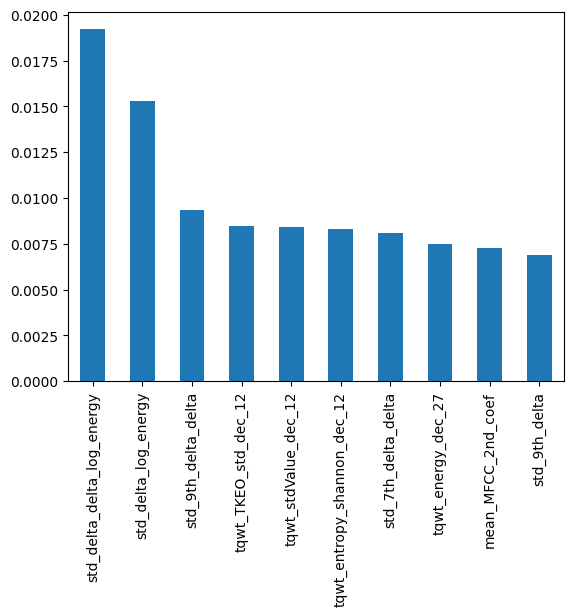

In [12]:
feature_imp = pd.Series(model.feature_importances_, index=df.columns[:len(model.feature_importances_)]).sort_values(ascending=False)

feature_imp.head(n=10).plot.bar()

In [13]:
from imblearn.over_sampling import SMOTE

In [14]:
X_resampled, y_resampled = SMOTE().fit_resample(df, df_y)

In [15]:
results = cross_validate(RandomForestClassifier(n_estimators=1000, max_depth=9), X_resampled, y_resampled, scoring=['accuracy', 'f1'], n_jobs=-1, cv=10)

In [16]:
print("Accuracy: " + str(results["test_accuracy"].mean()))
print("Accuracy standard deviation: " + str(np.std(results["test_accuracy"])))
print("F1: " + str(results["test_f1"].mean()))
print("F1 standard deviation: " + str(np.std(results["test_f1"])))

Accuracy: 0.9095305832147937
Accuracy standard deviation: 0.050986159232027976
F1: 0.904856684601361
F1 standard deviation: 0.056341760002422664


In [17]:
clf = RandomForestClassifier(n_estimators=1000, max_depth=9)

clf.fit(X_resampled, y_resampled)

RandomForestClassifier(max_depth=9, n_estimators=1000)

<AxesSubplot: >

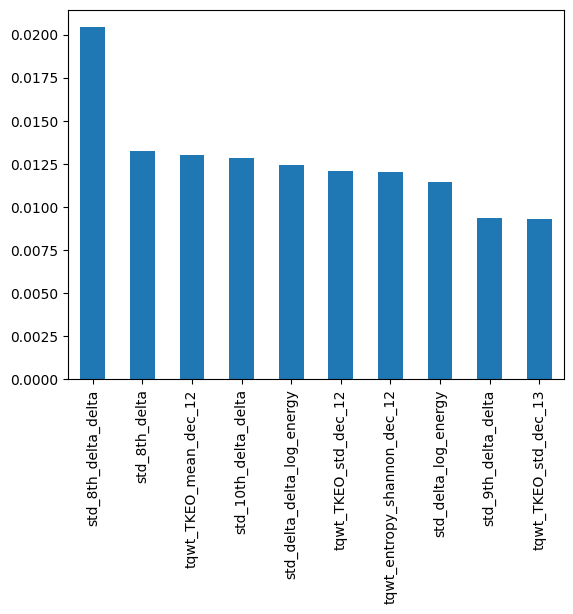

In [18]:
feature_imp = pd.Series(clf.feature_importances_, index=df.columns[:len(clf.feature_importances_)]).sort_values(ascending=False)

feature_imp.head(n=10).plot.bar()